In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>Welcome to Colab!</h1>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  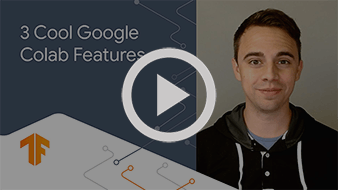
  </a>
</center>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
covid = pd.read_csv('/content/drive/MyDrive/covid1.csv',header=0)#load data
#covid.shape 
covid

,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,19,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,2,28,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,3,40,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,4,62,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,5,23,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,26,no,yes,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,no,no,no,no
483,484,51,no,no,no,no,yes,yes,no,no,yes,yes,yes,no,yes,yes,no,no,no,yes,yes,yes,no
484,485,32,no,no,no,no,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no
485,486,30,no,no,no,no,yes,no,yes,yes,no,yes,yes,no,yes,no,no,no,yes,no,yes,yes,no


In [ ]:
covid.replace('-',np.nan,inplace=True)
covid.head(25)


,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,19,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,2,28,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,3,40,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,4,62,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,5,23,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
5,6,34,no,yes,yes,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
6,7,39,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
7,8,46,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
8,9,20,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
9,10,27,yes,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [ ]:
covid.isnull().sum()

#                        0
age                    359
Sleep_problems           0
Headache                 1
Diarrhea                 0
Abdominal_pain           0
body_pain                0
Body_discoloration       0
Cough                    0
Fever                    0
Ague                     0
Sore_throat              0
Fatigue                  0
runny_nose               0
Chest_pain               0
Decreased_appetite       0
Vomit                    0
Nausea                   0
Sneezing                 0
Shortness_of_breath      0
Loss_of_smell            0
Loss_of_taste            0
urticaria                0
dtype: int64

In [ ]:
covid.replace('-',np.nan,inplace=True)
covid['Headache'].fillna('yes', inplace=True)


In [ ]:
covid['age'] = covid['age'].astype('float64')

In [ ]:
#Delete discarded data
max_age=covid['age'].max()
covid['age'][covid['age']==max_age]
covid.drop(103, axis=0, inplace=True)

In [ ]:
#پرکردن مقادیر null
covid['age'].fillna(covid.groupby('Sleep_problems')['age'].transform("median"),inplace=True)

#ستون سن به دلیل مقادیر null زیاد  حذف خواهد شد

In [ ]:
covid.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
482    False
483    False
484    False
485    False
486    False
Length: 486, dtype: bool

In [ ]:
covid.drop_duplicates(inplace=True) #Remove duplicate row
covid.duplicated() 

0      False
1      False
2      False
3      False
4      False
       ...  
482    False
483    False
484    False
485    False
486    False
Length: 486, dtype: bool

In [ ]:
#تبدیل yes no به 0 1
covid.Sleep_problems.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Headache.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Headache.replace(('Yes', 'No'), (1, 0), inplace=True)
covid.Diarrhea.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Diarrhea.replace(('Yes', 'No'), (1, 0), inplace=True)
covid.Abdominal_pain.replace(('yes', 'no'), (1, 0), inplace=True)
covid.body_pain.replace(('yes', 'no'), (1, 0), inplace=True)
covid.body_pain.replace(('Yes', 'No'), (1, 0), inplace=True)
covid.Body_discoloration.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Cough.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Cough.replace(('Yes', 'No'), (1, 0), inplace=True)
covid.Fever.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Fever.replace(('Yes', 'No'), (1, 0), inplace=True)
covid.Ague.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Sore_throat.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Sore_throat.replace(('Yes', 'No'), (1, 0), inplace=True)
covid.Fatigue.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Fatigue.replace(('Yes', 'No'), (1, 0), inplace=True)
covid.runny_nose.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Chest_pain.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Decreased_appetite.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Vomit.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Nausea.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Sneezing.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Shortness_of_breath.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Loss_of_smell.replace(('yes', 'no'), (1, 0), inplace=True)
covid.Loss_of_taste.replace(('yes', 'no'), (1, 0), inplace=True)
covid.urticaria.replace(('yes', 'no'), (1, 0), inplace=True)

covid


,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,19.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,28.0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,40.0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,62.0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,23.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,26.0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0
483,484,51.0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0
484,485,32.0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0
485,486,30.0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0


In [ ]:
#مرتب سازی داده
covid.sort_values('age',inplace=True)
covid

,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
91,92,2.0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
444,445,3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
450,451,10.0,1,1,0,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0
462,463,14.0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0
425,426,15.0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,468,70.0,1,0,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0
99,100,76.0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,12,76.0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,101,85.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#پیدا کردن 5 ویژگی که کم ترین اهمیت را دارند
covid = covid.drop(covid.index[covid['Abdominal_pain'] == 'es'])


In [ ]:
covid['Sleep_problems'].value_counts()


0    434
1     51
Name: Sleep_problems, dtype: int64

In [ ]:
covid['Headache'].value_counts()

0    281
1    204
Name: Headache, dtype: int64

In [ ]:
covid['Diarrhea'].value_counts()

0    408
1     77
Name: Diarrhea, dtype: int64

In [ ]:
covid['Abdominal_pain'].value_counts()


0    449
1     36
Name: Abdominal_pain, dtype: int64

In [ ]:
covid['body_pain'].value_counts()

0    267
1    218
Name: body_pain, dtype: int64

In [ ]:
covid['Body_discoloration'].value_counts()


0    461
1     24
Name: Body_discoloration, dtype: int64

In [ ]:
covid['Cough'].value_counts()


0    248
1    237
Name: Cough, dtype: int64

In [ ]:
covid['Fever'].value_counts()


1    281
0    204
Name: Fever, dtype: int64

In [ ]:
covid['Ague'].value_counts()


0    444
1     41
Name: Ague, dtype: int64

In [ ]:
covid['Sore_throat'].value_counts()


0    340
1    145
Name: Sore_throat, dtype: int64

In [ ]:
covid['Fatigue'].value_counts()


0    279
1    206
Name: Fatigue, dtype: int64

In [ ]:
covid['runny_nose'].value_counts()


0    392
1     93
Name: runny_nose, dtype: int64

In [ ]:
covid['Chest_pain'].value_counts()


0    424
1     61
Name: Chest_pain, dtype: int64

In [ ]:
covid['Decreased_appetite'].value_counts()


0    378
1    107
Name: Decreased_appetite, dtype: int64

In [ ]:
covid['Vomit'].value_counts()


0    469
1     16
Name: Vomit, dtype: int64

In [ ]:
covid['Nausea'].value_counts()


0    422
1     63
Name: Nausea, dtype: int64

In [ ]:
covid['Sneezing'].value_counts()


0    448
1     37
Name: Sneezing, dtype: int64

In [ ]:
covid['Shortness_of_breath'].value_counts()


0    325
1    160
Name: Shortness_of_breath, dtype: int64

In [ ]:
covid['Loss_of_smell'].value_counts()


0    378
1    107
Name: Loss_of_smell, dtype: int64

In [ ]:
covid['Loss_of_smell'].value_counts()


0    378
1    107
Name: Loss_of_smell, dtype: int64

In [ ]:
covid['Loss_of_taste'].value_counts()

0    423
1     62
Name: Loss_of_taste, dtype: int64

In [ ]:
covid['urticaria'].value_counts()

0    477
1      8
Name: urticaria, dtype: int64

In [ ]:
covid.drop(['urticaria','Vomit','Body_discoloration','Abdominal_pain','age'], axis = 1,inplace=True)
covid

,#,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste
91,92,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
444,445,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
450,451,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0,1,1
462,463,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
425,426,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,468,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,0,0
99,100,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,12,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
100,101,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#normalize
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
names = covid.columns
d = scaler.fit_transform(covid)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

,#,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste
0,0.187243,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913580,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.925926,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.950617,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.874486,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.960905,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
481,0.203704,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.022634,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,0.205761,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaled_df.sort_values('#',inplace=True)
scaled_df

,#,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste
12,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.002058,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,0.004115,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,0.006173,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.008230,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,0.991770,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
461,0.993827,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
170,0.995885,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
53,0.997942,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
# create label col
covid['concept']=0
covid

,#,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,concept
91,92,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
444,445,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
450,451,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0
462,463,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0
425,426,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,468,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0
99,100,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,12,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
100,101,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(len(covid)):
  if ( (covid.iloc[i,2] ==1) or (covid.iloc[i,3] ==1) or (covid.iloc[i,4] ==1)
    or (covid.iloc[i,5]==1) or (covid.iloc[i,6]==1) or (covid.iloc[i,7]==1) or (covid.iloc[i,8]==1)
    or (covid.iloc[i,9]==1) or (covid.iloc[i,10]==1) or (covid.iloc[i,11]==1) or (covid.iloc[i,12]==1)
    or (covid.iloc[i,13]==1) or (covid.iloc[i,14]==1) or (covid.iloc[i,15]==1) or (covid.iloc[i,16]==1) 
    or (covid.iloc[i,17]==1) or (covid.iloc[i,18]==1) ) :

    
    covid.iloc[i,18] = 1

covid.head(35)

,#,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,concept
91,92,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
444,445,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
450,451,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0,1,1,1
462,463,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
425,426,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1
436,437,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1
445,446,0,0,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1
451,452,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1
18,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
457,458,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1


In [ ]:
covid.drop(['#'], axis = 1,inplace=True)
covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,concept
91,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
444,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
450,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0,1,1,1
462,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
425,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0,0,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1
99,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
100,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
covid.to_csv (r'covid.csv', index = False, header=True)


In [ ]:
concepts=np.array(covid)[:,:-1]
concepts

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [ ]:
target=np.array(covid)[:,-1]
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#find-s algorithm
def train (con,tar):
    for i,val in enumerate(tar):
        if val== 1:
            specific_h=con[i].copy()
            break
    for i,val in enumerate(con):
        if tar[i]== 1:
            for x in range(len(specific_h)):
                if val[x] != specific_h[x]:
                    specific_h[x]='0'#به جای  ؟ عدد 0 قرار داده شده است
                else:
                    pass
    return specific_h


In [ ]:
print(train(concepts,target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#CE algorithm
def learn(c, t):

    specific_hy = c[0].copy()

    print("Initialization of specific_h and general_h")

    print("specific_h: ",specific_hy)

    general_h = [["?" for i in range(len(specific_hy))] for i in range(len(specific_hy))]

    print("general_h: ",general_h)

    print("concepts: ",c)

    for i, h in enumerate(c):

        if t[i] == 1:

            for x in range(len(specific_hy)):

                #print("h[x]",h[x])

                if h[x] != specific_hy[x]:

                    specific_hy[x] = '0'

                    general_h[x][x] = '0'

        if t[i] == 0:

            for x in range(len(specific_hy)):

                if h[x] != specific_hy[x]:

                    general_h[x][x] = specific_hy[x]

                else:

                    general_h[x][x] = '0'

    print("\nSteps of Candidate Elimination Algorithm: ",i+1)

    print("Specific_h: ",i+1)

    print(specific_hy,"\n")

    print("general_h :", i+1)

    print(general_h)

    indices = [i for i, val in enumerate(general_h) if val == ['0', '0', '0', '0', '0', '0','0','0','0','0','0','0','0','0','0','0','0']]

    print("\nIndices",indices)

    for i in indices:

        general_h.remove(['0', '0', '0', '0', '0', '0','0','0','0','0','0','0','0','0','0','0','0'])

    return specific_hy, general_h

s_final,g_final = learn(concepts, target)

print("\nFinal Specific_h:", s_final, sep="\n")

print("Final General_h:", g_final, sep="\n")

Initialization of specific_h and general_h
specific_h:  [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
general_h:  [['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?',

In [ ]:
#naive bayes
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(concepts,target,test_size=0.3,random_state=100)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(y_pred)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred))
cm

array([[  1,   0],
       [  0, 145]])

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test,y_test)


0.9931506849315068

In [ ]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       145

    accuracy                           0.99       146
   macro avg       0.50      0.50      0.50       146
weighted avg       0.99      0.99      0.99       146



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#clustering
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
feature_columns = ['Sleep_problems', 'Headache', 'Diarrhea','body_pain','Cough','Fever','Ague',
                   'Sore_throat','Fatigue' ,'runny_nose','Chest_pain',
                   'Decreased_appetite','Nausea','Sneezing','Shortness_of_breath',
                   'Loss_of_smell','Loss_of_taste']
X = covid[feature_columns]

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
centers = kmeans.cluster_centers_
print(centers)

[[0.43636364 0.6        0.21818182 0.98181818 0.85454545 0.87272727
  0.58181818 0.78181818 0.83636364 0.52727273 0.63636364 0.94545455
  0.29090909 0.49090909 0.76363636 0.87272727 0.78181818]
 [0.00724638 0.46376812 0.05797101 0.05797101 0.39855072 0.79710145
  0.02173913 0.57971014 0.39130435 0.1884058  0.0942029  0.10869565
  0.2173913  0.01449275 0.8115942  0.20289855 0.00724638]
 [0.0890411  0.36643836 0.19520548 0.53424658 0.46232877 0.42123288
  0.02054795 0.07534247 0.3630137  0.13013699 0.04452055 0.1369863
  0.05821918 0.02739726 0.02054795 0.10616438 0.06164384]]


In [ ]:
#random forest
X_train,X_test,y_train,y_test=train_test_split(concepts,target,test_size=0.7,random_state=100)
X_train.shape, X_test.shape


((145, 17), (340, 17))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=100, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=100)

In [ ]:
classifier_rf.oob_score_


0.993103448275862

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_


0.9932432432432432

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

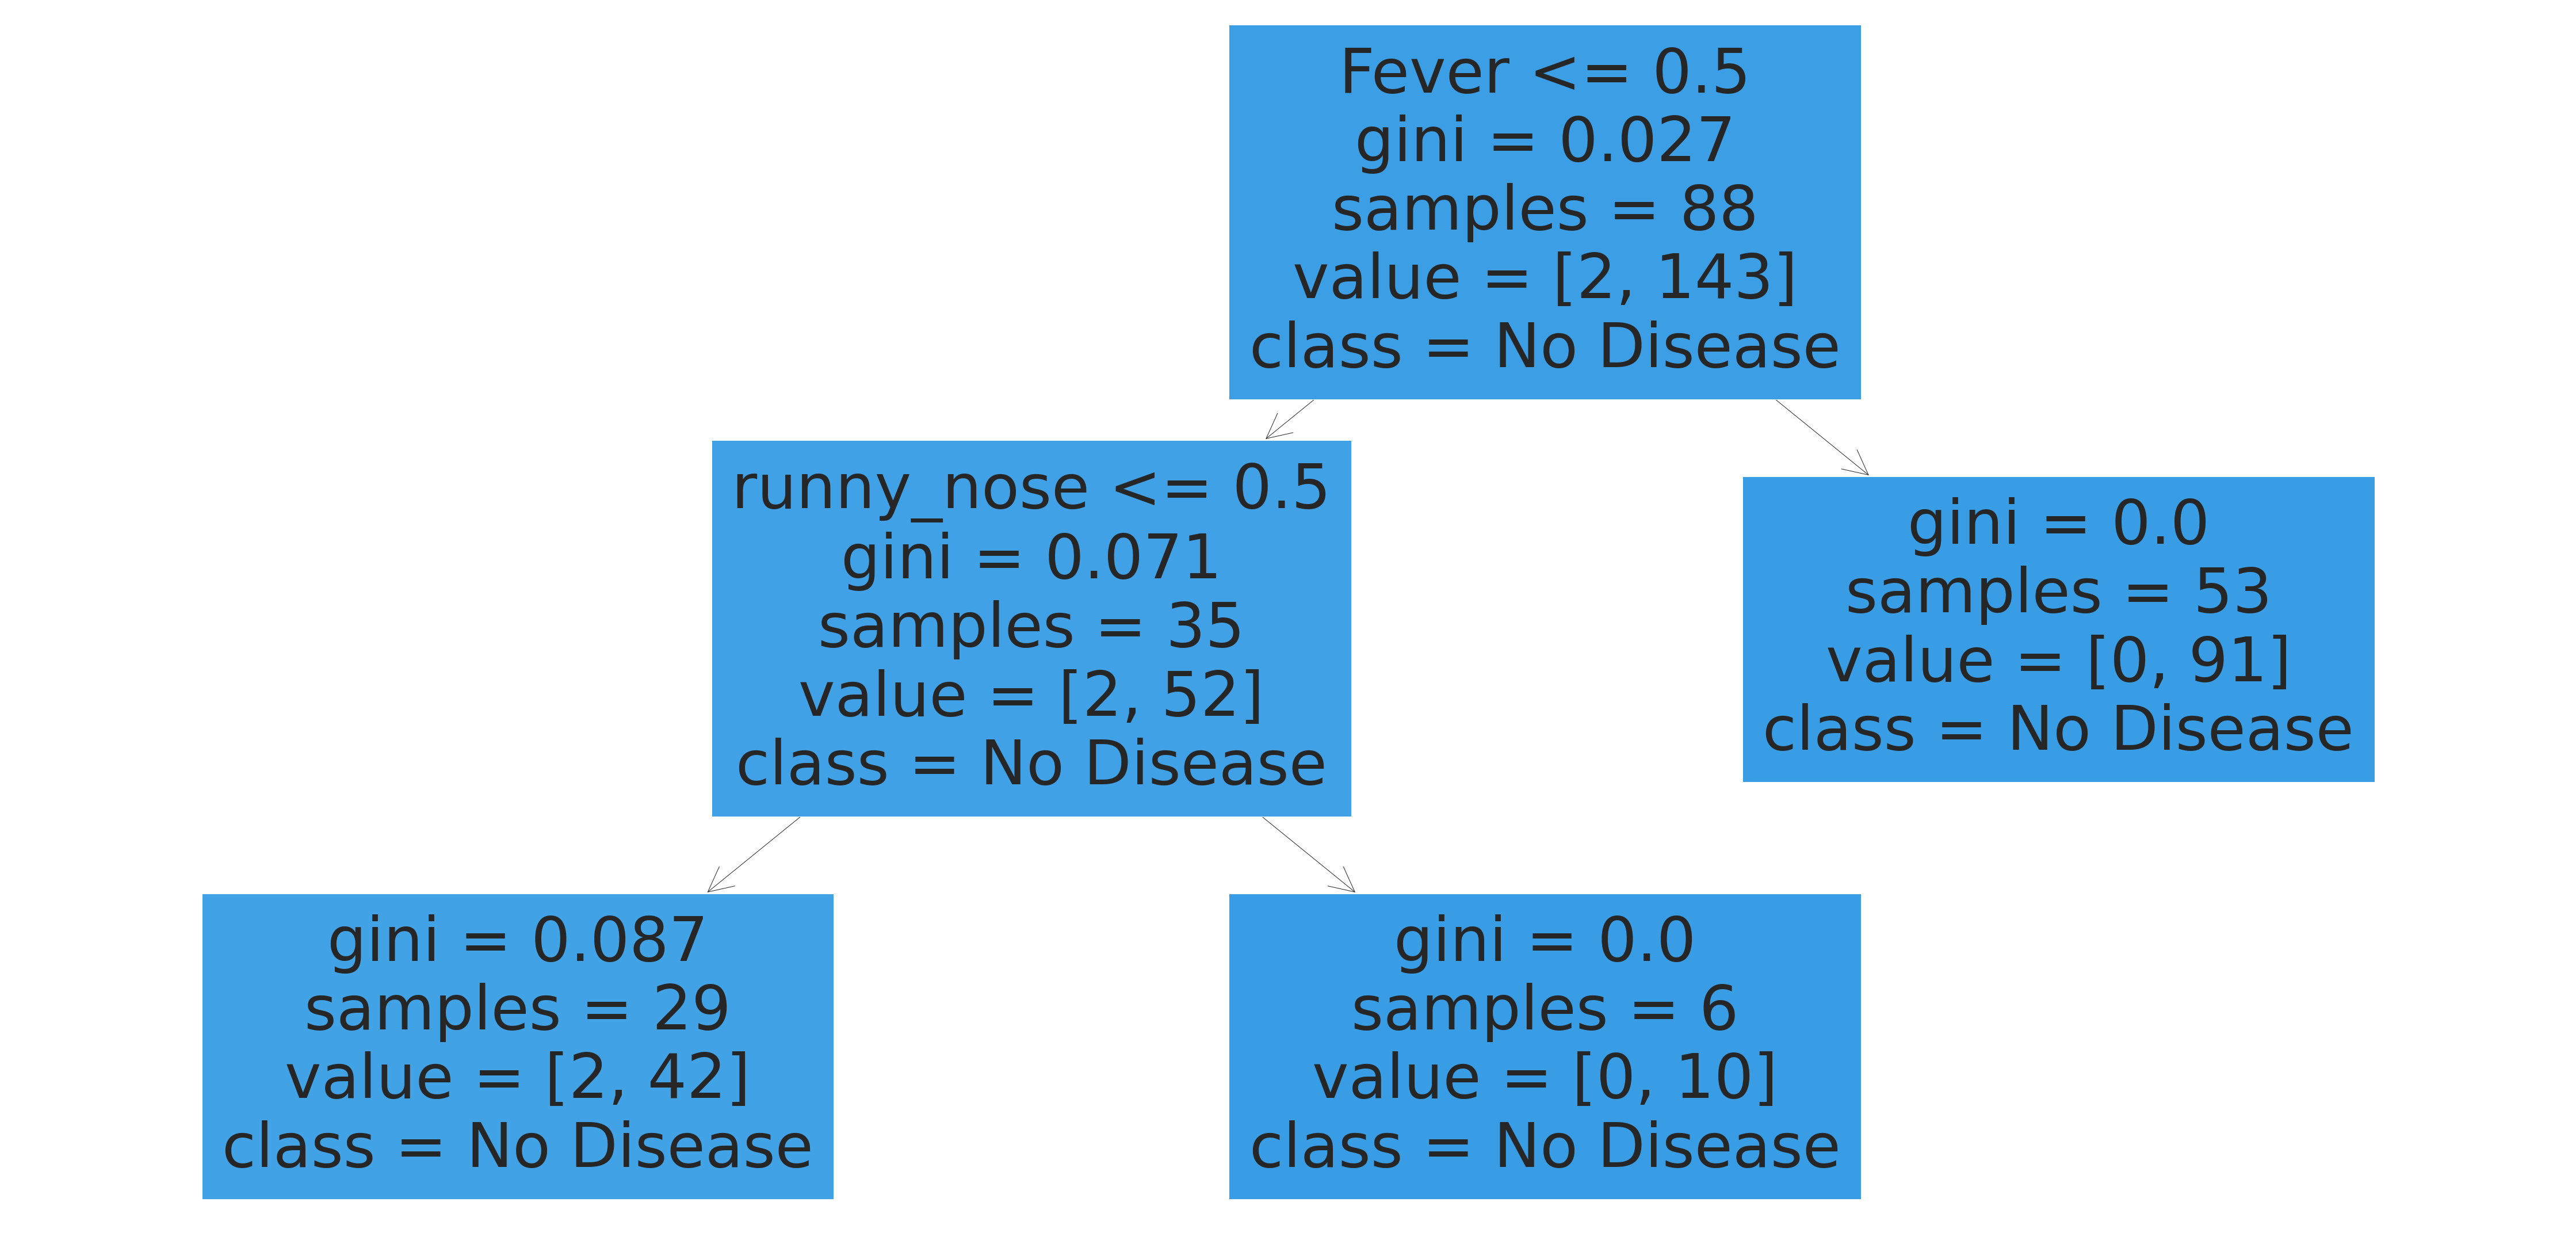

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

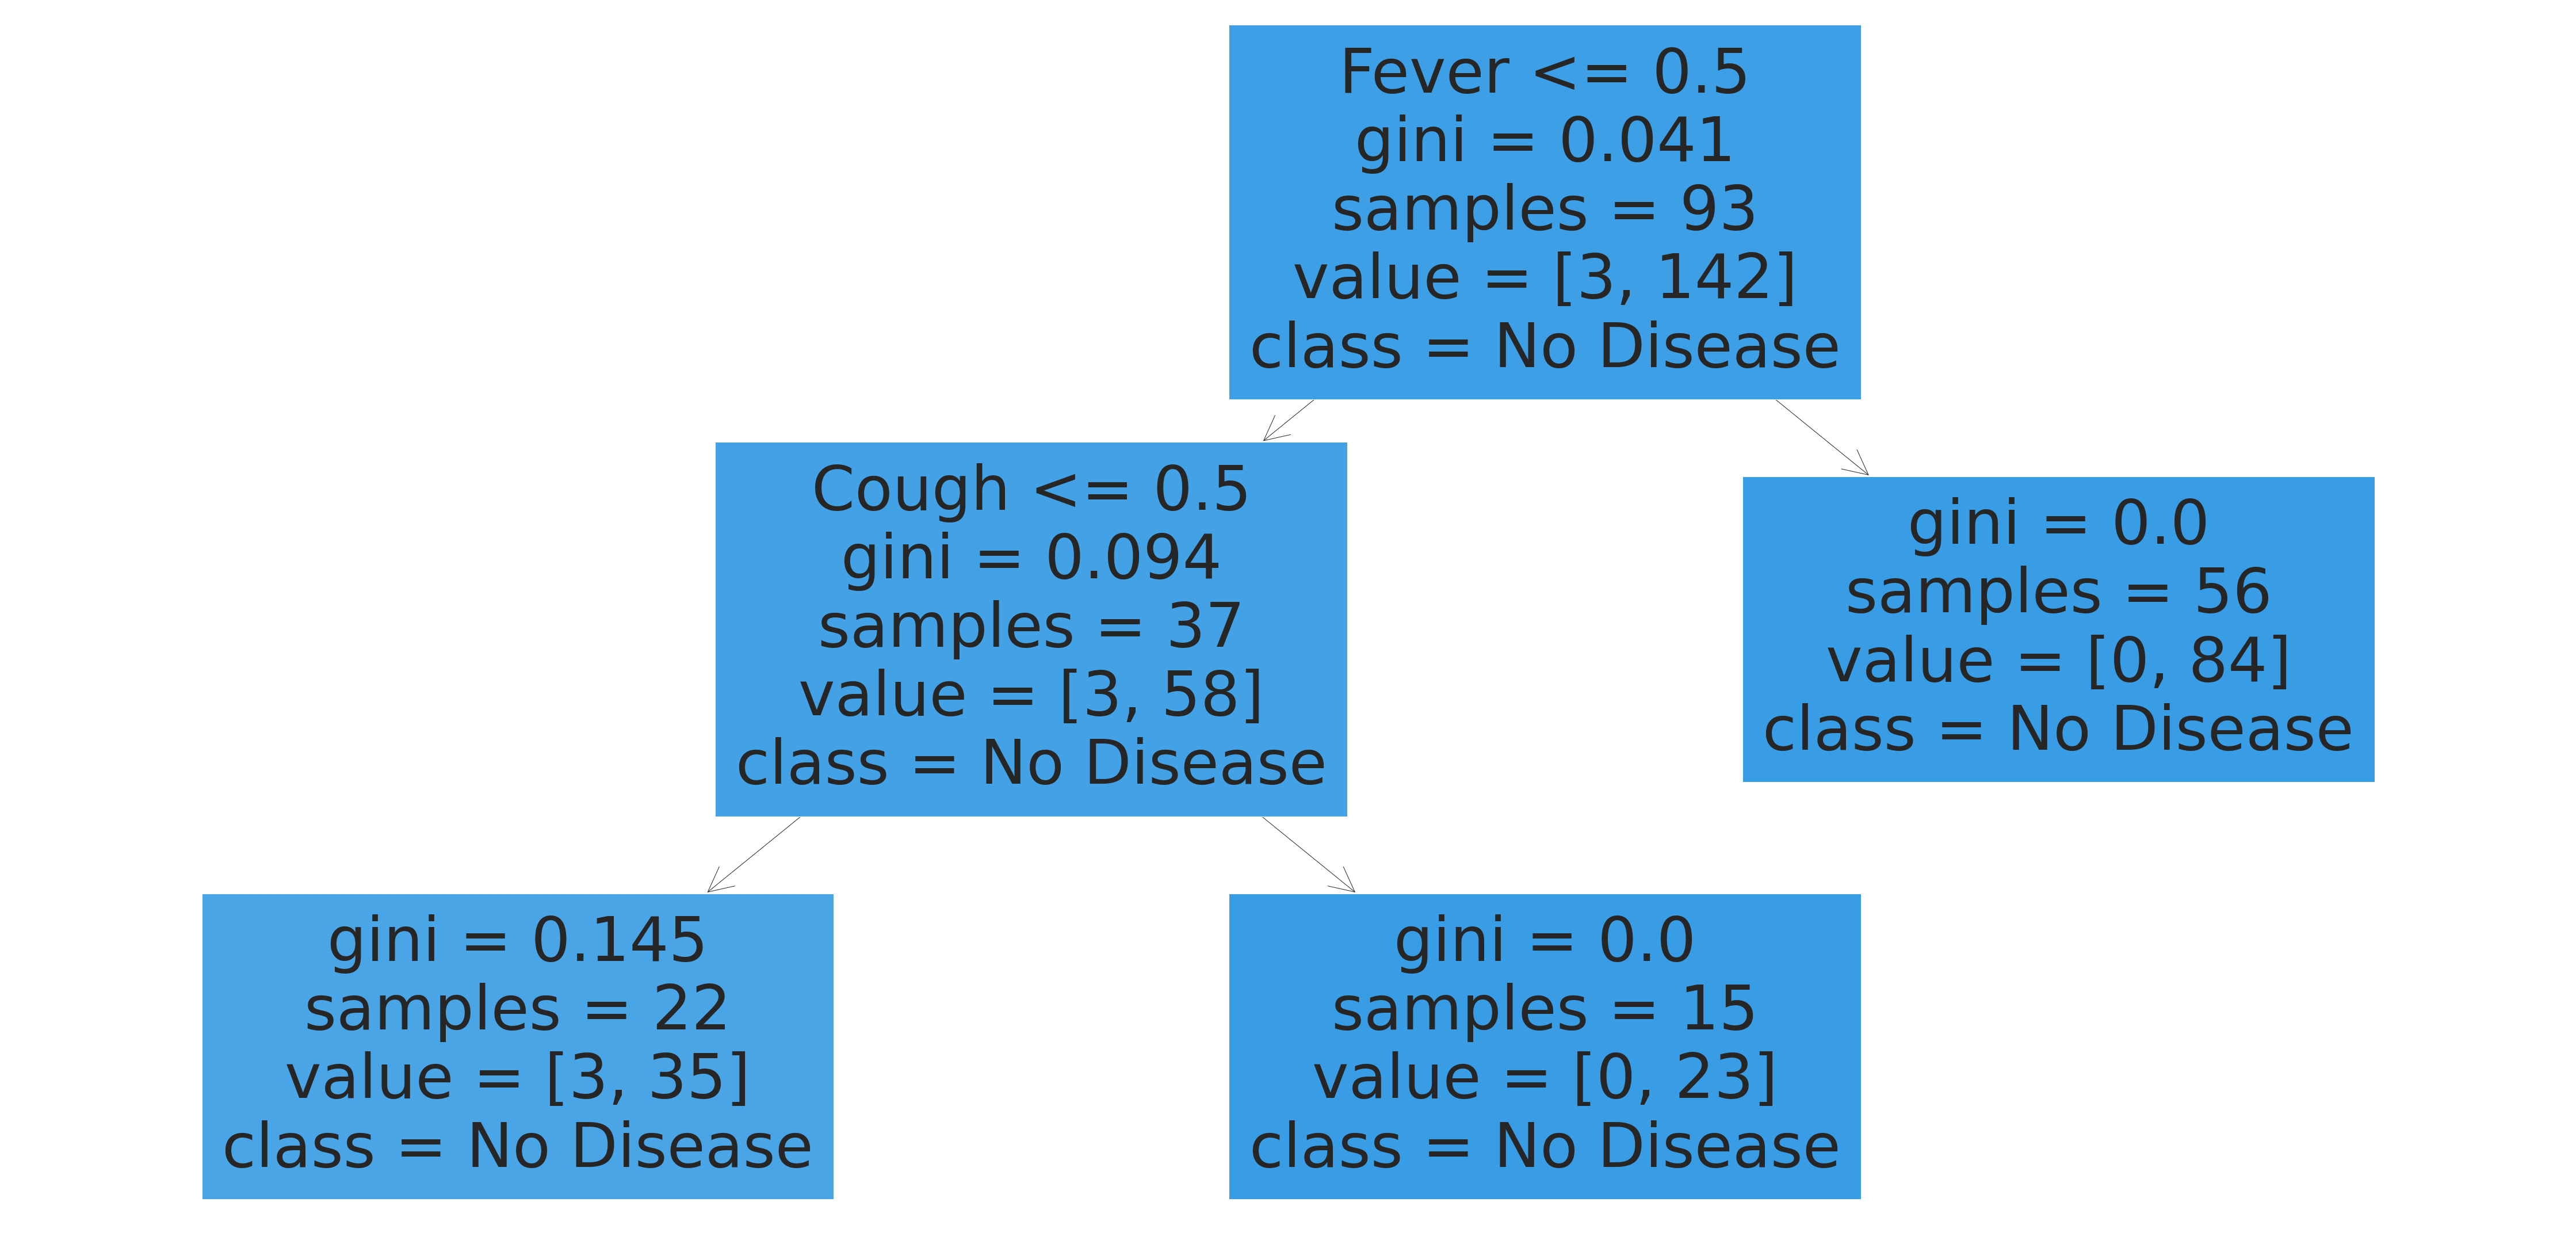

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [ ]:
rf_best.feature_importances_


array([0.        , 0.06220506, 0.        , 0.08958466, 0.25036794,
       0.42816053, 0.        , 0.        , 0.07896173, 0.06735811,
       0.        , 0.        , 0.02336198, 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(concepts,target,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  1   0]
 [  1 144]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.99      1.00       145

    accuracy                           0.99       146
   macro avg       0.75      1.00      0.83       146
weighted avg       1.00      0.99      0.99       146



In [ ]:
#id3
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] #the total size of the dataset
    total_entr = 0
    
    for c in class_list: #for each class in the label
        total_class_count = train_data[train_data[label] == c].shape[0] #number of the class
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) #entropy of the class
        total_entr += total_class_entr #adding the class entropy to the total entropy of the dataset
    
    return total_entr

In [ ]:
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] #row count of class c 
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count #probability of the class
            entropy_class = - probability_class * np.log2(probability_class)  #entropy
        entropy += entropy_class
    return entropy

In [ ]:
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() #unqiue values of the feature
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value] #filtering rows with that feature_value
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) #calculcating entropy for the feature value
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy #calculating information of the feature value
        
    return calc_total_entropy(train_data, label, class_list) - feature_info #calculating information gain by subtracting


In [ ]:
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label) #finding the feature names in the dataset
                                            #N.B. label is not a feature, so dropping it
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  #for each feature in the dataset
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain: #selecting feature name with highest information gain
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature

In [ ]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False) #dictionary of the count of unqiue feature value
    tree = {} #sub tree or node
    
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value] #dataset with only feature_name = feature_value
        
        assigned_to_node = False #flag for tracking feature_value is pure class or not
        for c in class_list: #for each class
            class_count = feature_value_data[feature_value_data[label] == c].shape[0] #count of class c

            if class_count == count: #count of feature_value = count of class (pure class)
                tree[feature_value] = c #adding node to the tree
                train_data = train_data[train_data[feature_name] != feature_value] #removing rows with feature_value
                assigned_to_node = True
        if not assigned_to_node: #not pure class
            tree[feature_value] = "?" #should extend the node, so the branch is marked with ?
            
    return tree, train_data

In [ ]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0: #if dataset becomes enpty after updating
        max_info_feature = find_most_informative_feature(train_data, label, class_list) #most informative feature
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list) #getting tree node and updated dataset
        next_root = None
        
        if prev_feature_value != None: #add to intermediate node of the tree
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else: #add to root of the tree
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()): #iterating the tree node
            if branch == "?": #if it is expandable
                feature_value_data = train_data[train_data[max_info_feature] == node] #using the updated dataset
                make_tree(next_root, node, feature_value_data, label, class_list) #recursive call with updated dataset

In [ ]:
def id3(train_data_m, label):
    train_data = train_data_m.copy() #getting a copy of the dataset
    tree = {} #tree which will be updated
    class_list = train_data[label].unique() #getting unqiue classes of the label
    make_tree(tree, None, train_data_m, label, class_list) #start calling recursion
    return tree

In [ ]:
tree = id3(covid, 'concept')
tree

{'Fever': {0: {'body_pain': {0: {'Cough': {0: {'Headache': {0: {'Decreased_appetite': {0: {'Loss_of_smell': {0: {'Sore_throat': {0: {'runny_nose': {0: {'Diarrhea': {0: {'Shortness_of_breath': {0: 0,
                    1: 1}},
                  1: 1}},
                1: 1}},
              1: 1}},
            1: 1}},
          1: 1}},
        1: 1}},
      1: 1}},
    1: 1}},
  1: 1}}

In [ ]:
from sklearn.model_selection import cross_val_predict,KFold,cross_val_score, train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(concepts, target, test_size=0.2, random_state=1)
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train,y_train)
results = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std()))
y_pred = cross_val_predict(estimator=clf, X=concepts, y=target, cv=4)
conf_mat = confusion_matrix(target,y_pred)
print(conf_mat)


Accuracy: 1.00 (+/- 0.00)
[[  5   0]
 [ 10 470]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  UserWarning,





<h1>What is Colab?</h1>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

## <strong>Getting started</strong>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

## Data science

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

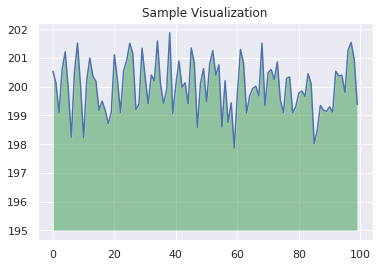

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

# New section

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

## More resources

### Working with notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with data
- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine learning crash course
These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

### Featured examples

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
